# LAB 07. REVIEW EXERCISE

# NUMBER BOUNDING BOXES DETECTION
Given an image of numbers in black color on a white background. The input image may be affected by noise such as disconnected parts of each number, cluttered background …
Your goal is to make a program using Python finding and drawing the bounding boxes of each number appeared in the given image. A bounding box of a number is a rectangle enclosing the number entirely. 


**(1) the original image with number bounding boxes shown in red color (output.jpg)**


In [27]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow   

In [28]:
image = cv2.imread('test_numbers.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [29]:
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [30]:
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 1)
    ROI = original[y:y+h, x:x+w]
    ROI_number += 1

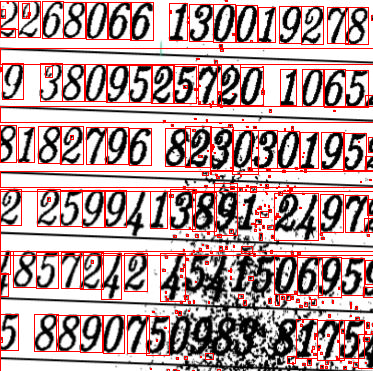

-1

In [31]:
cv2.imwrite('output.jpg', image)
cv2_imshow( image)
cv2.waitKey()

**(2) a text file in which each line including each bounding box information (the top-left coordinates, width and height of each detected bounding box separated by a space character) (output.txt)**

In [34]:
# !pip install pillow
# !pip install pytesseract
!pip install tesseract
!pip install tesseract-ocr

     |████████████████████████████████| 45.6 MB 40.8 MB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562569 sha256=bdd009f7cc637c7b601e8e2b994a5d22770ea48afde9cebf175114a0552c2525
  Stored in directory: /root/.cache/pip/wheels/01/3f/af/2f732560b9c4e51dd131bcbc6b7466a3124d15ab3fd393f85a
Successfully built tesseract
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ulwld2ap/tesseract-ocr_3f409afa45314077aa300fe390087352/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ulwld2ap/tesseract-ocr_3f409afa45314077aa300fe390087352/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"'

In [39]:
# !pip install pillow
# !pip install pytesseract
# !pip install tesseract
# !pip install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=adccb2846c63a0733225df88c52ef9de9ad2d8cb23e4c567390faebf65cc226d
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-avgsrnhu/tesseract-ocr_d700bbd4fb464206870d208766dcd0da/setup.py'"'"'; __file__='"'"'/tmp/pip-install-avgsrnhu/tesseract-ocr_d700bbd4fb464206870d208766dcd0da/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');

In [40]:
import cv2
import pytesseract

In [41]:
pytesseract.pytesseract.tesseract_cmd = 'tesseract.exe'

In [43]:
img = cv2.imread("test_numbers.jpg")

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [45]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [46]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [47]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [49]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

In [50]:
im2 = img.copy()

In [51]:
file = open("output.txt", "w+")
file.write("")
file.close()

In [53]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [54]:
def remove_noise(image):
    return cv2.medianBlur(image,5)

In [55]:
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [56]:
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
 

In [57]:
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

In [58]:
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

In [59]:
def canny(image):
    return cv2.Canny(image, 100, 200)

In [60]:
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [61]:
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [62]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

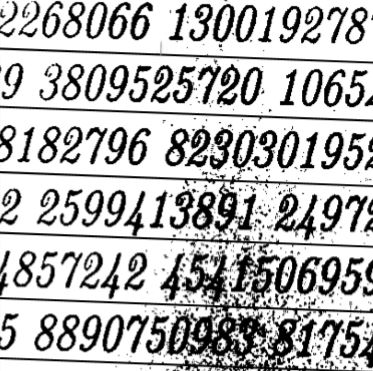

In [63]:
cv2_imshow(gray)

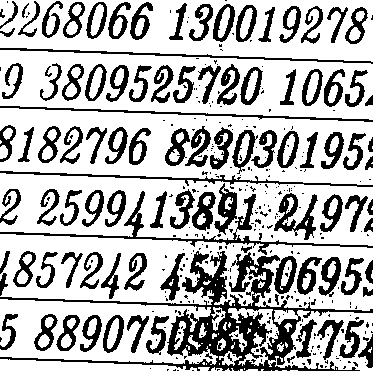

In [64]:
cv2_imshow(thresh)

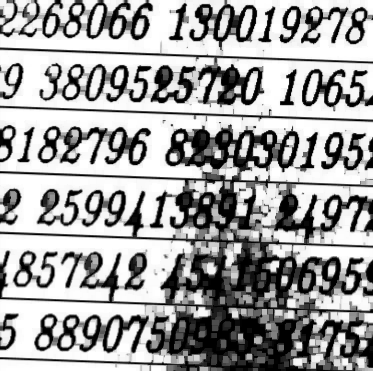

In [65]:
cv2_imshow(opening)

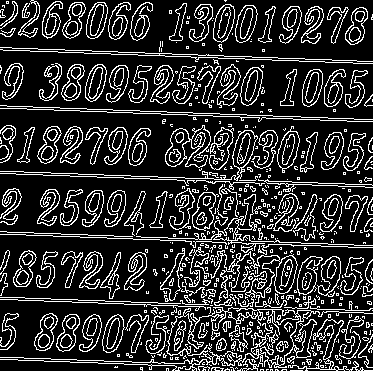

In [66]:
cv2_imshow(canny)

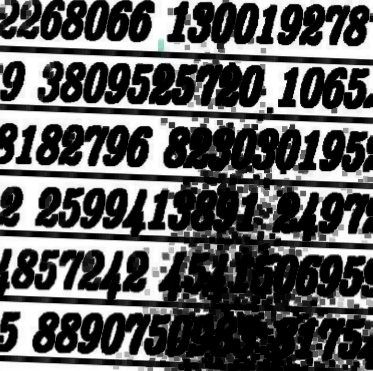

In [67]:
cv2_imshow(erode(img))

In [70]:
file = open("output.txt", "w+")
file.write("")
file.close()